# Superstore Sales: Categorical Analysis

In [1]:
from helper_funcs import *
from sqlalchemy import create_engine

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# SQLAlchemy Engine
engine = create_engine(generate_url())

In [3]:
# Category-SubCategory Financials (CSCF)
cscf_df = pd.read_sql_table(table_name='categorical_financials', con=engine.connect())
cscf_df

,Department,Division,DivisionVolume,AveragePurchase,DivisionSales,DiscountsValueGiven,DivisionProfit
0,Technology,Copiers,68,2198.94,149528.03,17999.73,55617.82
1,Technology,Phones,889,371.21,330007.05,48092.94,44515.73
2,Technology,Accessories,775,215.97,167380.32,9802.00,41936.64
3,Office Supplies,Paper,1370,57.28,78479.21,5064.27,34053.57
4,Office Supplies,Binders,1523,133.56,203412.73,43745.08,30221.76
5,Furniture,Chairs,617,532.33,328449.10,49814.80,26590.17
6,Office Supplies,Storage,846,264.59,223843.61,13197.97,21278.83
7,Office Supplies,Appliances,466,230.76,107532.16,7490.30,18138.01
8,Furniture,Furnishings,957,95.83,91705.16,8708.95,13059.14
9,Office Supplies,Envelopes,254,64.87,16476.40,1173.99,6964.18


In [19]:
cat_df = cscf_df[['Department', 'DivisionVolume', 'DivisionSales', 'DivisionProfit']].groupby(by="Department", as_index=False).sum()
cat_df = cat_df.rename(mapper={'DivisionVolume':'DepartmentVolume', 'DivisionSales':'DepartmentSales', 'DivisionProfit':'DepartmentProfit'}, axis=1)
cat_df

,Department,DepartmentVolume,DepartmentSales,DepartmentProfit
0,Furniture,2121,741999.79,18451.27
1,Office Supplies,6026,719047.03,122490.81
2,Technology,1847,836154.03,145454.95


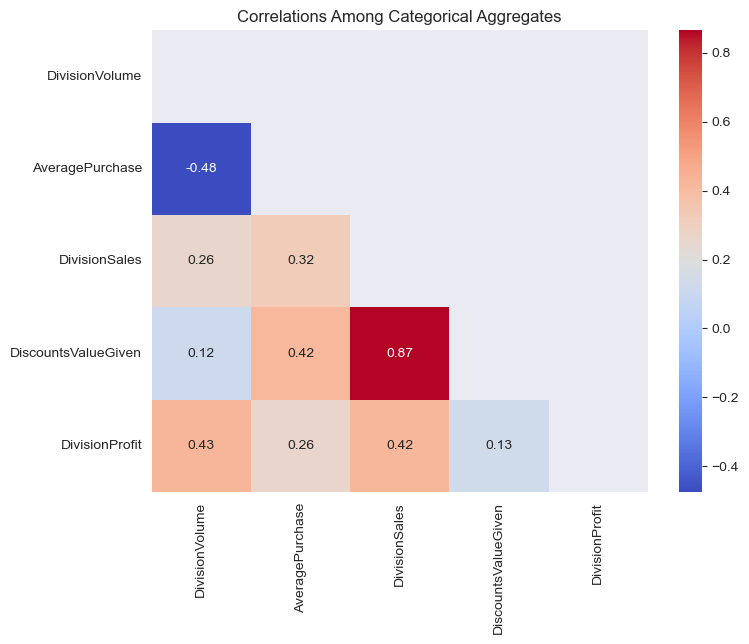

In [20]:
# Correlation matrix for numerical features in cat_df
corr_obj = cscf_df.drop(labels=['Department', 'Division'], axis=1, inplace=False).corr()

# Upper triangular mask
mask = np.triu(np.ones_like(corr_obj, dtype=bool))

# Plot heatmap of correlations, applying mask to reduce visual clutter
plt.figure(figsize=(8, 6))
sns.heatmap(corr_obj, annot=True, fmt=".2f", cmap='coolwarm', mask=mask)

plt.title("Correlations Among Categorical Aggregates")
plt.show()

**INSIGHT**: Though not surprising - and hardly an insight at all - ```DiscountsValueGiven``` shows moderately high positive correlation (87%) with ```DivisionSales```. So, application of discounts are likely to be accompanied by an increase to the total sales a division (sub-category) closes on.

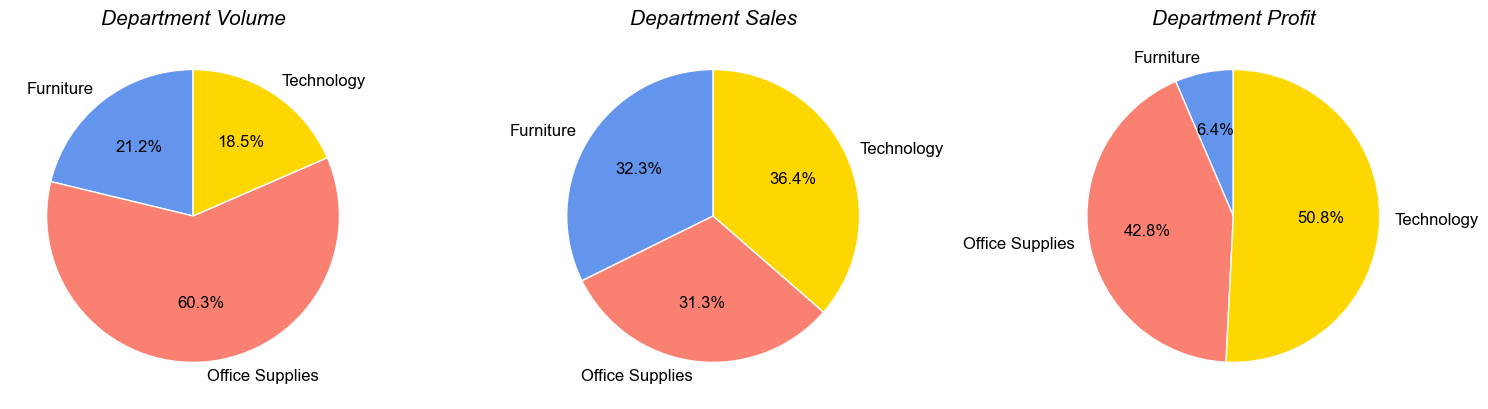

In [21]:
val_cols = ['DepartmentVolume', 'DepartmentSales', 'DepartmentProfit']

# Define text properties for later use.
txt_prop_a = {'fontsize': 12, 'color': 'black'}
txt_prop_b = {'fontsize': 15, 'color': 'black', 'fontstyle': 'oblique'}

# Create custom Pie Charts for Volume, Sales, and Profit by Department.
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, value in enumerate(val_cols):
    axes[i].pie(x=cat_df[value], labels=cat_df['Department'], autopct='%1.1f%%', startangle=90,
                colors=['cornflowerblue', 'salmon', 'gold'], textprops=txt_prop_a)
    axes[i].set_title(aesthetic_split(value), **txt_prop_b)

plt.tight_layout()
plt.show()

## Department Overviews

### Technology Department

In [22]:
cscf_df[cscf_df['Department'] == 'Technology']

,Department,Division,DivisionVolume,AveragePurchase,DivisionSales,DiscountsValueGiven,DivisionProfit
0,Technology,Copiers,68,2198.94,149528.03,17999.73,55617.82
1,Technology,Phones,889,371.21,330007.05,48092.94,44515.73
2,Technology,Accessories,775,215.97,167380.32,9802.00,41936.64
12,Technology,Machines,115,1645.55,189238.63,46765.98,3384.76


In [23]:
copiers = pd.read_sql_table(table_name='copiers', con=engine.connect())
copiers.head(10)

,CustomerID,Segment,Region,State,ShipMode,DTS,ProductID,ProductName,Profit
0,TC-20980,Corporate,Central,Indiana,Standard Class,7,TEC-CO-10004722,Canon imageCLASS 2200 Advanced Copier,8399.9760
1,RB-19360,Consumer,West,Washington,First Class,2,TEC-CO-10004722,Canon imageCLASS 2200 Advanced Copier,6719.9808
2,HL-15040,Consumer,East,Delaware,Standard Class,5,TEC-CO-10004722,Canon imageCLASS 2200 Advanced Copier,5039.9856
3,TA-21385,Home Office,East,New York,First Class,2,TEC-CO-10004722,Canon imageCLASS 2200 Advanced Copier,3919.9888
4,DR-12940,Home Office,East,Rhode Island,Standard Class,4,TEC-CO-10001449,Hewlett Packard LaserJet 3310 Copier,2591.9568
5,HM-14860,Corporate,Central,Missouri,Standard Class,6,TEC-CO-10003763,Canon PC1060 Personal Laser Copier,2302.9671
6,FH-14365,Corporate,West,Washington,First Class,1,TEC-CO-10001766,Canon PC940 Copier,1480.4671
7,JE-15610,Corporate,South,Georgia,Second Class,2,TEC-CO-10001449,Hewlett Packard LaserJet 3310 Copier,1439.9760
8,AD-10180,Home Office,West,Montana,Standard Class,5,TEC-CO-10003236,Canon Image Class D660 Copier,1379.9770
9,CC-12370,Consumer,East,Pennsylvania,Standard Class,4,TEC-CO-10004722,Canon imageCLASS 2200 Advanced Copier,1119.9968


In [37]:
# Selecting ProductName and Profit, find the top 3 best-performing Copiers, in terms of gross profitability.
copiers[['ProductName', 'Profit']].groupby(by='ProductName', as_index=False).sum().sort_values(by='Profit', ascending=False).head(3)

,ProductName,Profit
7,Canon imageCLASS 2200 Advanced Copier,25199.9280
10,Hewlett Packard LaserJet 3310 Copier,6983.8836
4,Canon PC1060 Personal Laser Copier,4570.9347


**INSIGHT**: Technology makes up the smallest portion (< 20%) of orders, but accounts for about 30% of all Sales, and just over 50% of all Profits. Copiers, in particular, seem to the most profitable Division (Sub-Category). The *Canon imageCLASS 2200*, *HP LaserJet 3310*, and *Canon PC1060* rank highest in product stack.

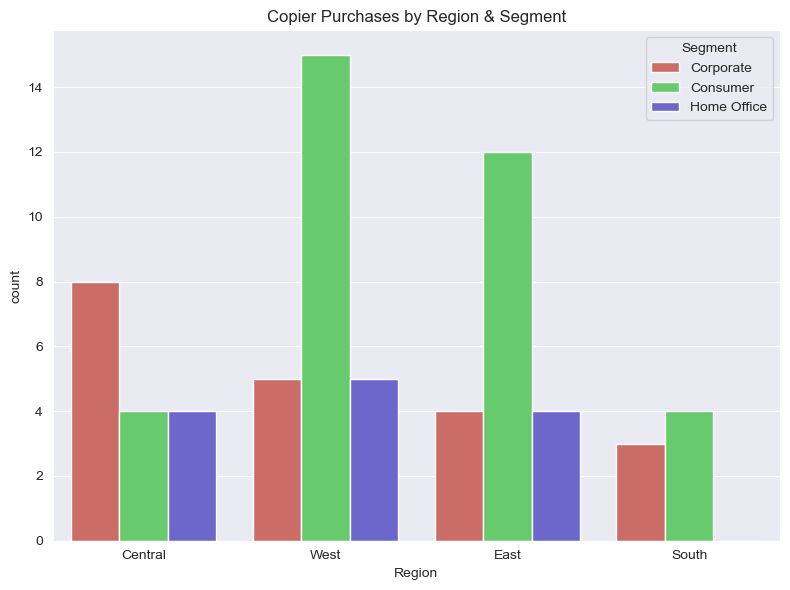

In [42]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.countplot(data=copiers, x='Region', hue='Segment', ax=ax, palette=sns.color_palette('hls', 3))
ax.set_title('Copier Purchases by Region & Segment')

fig.tight_layout()
plt.show()

**INSIGHT**: It would appear that the majority copiers being bought by consumers, primarily West- and East-coast ones. While less in count, sales by Kelly to the Central region break patterns from the other 3 regions in the sense that the majority of her sales go to Corporate buyers.

### Office Supplies Department

In [31]:
# TODO: Analyze Office Supplies data

In [27]:
office_df = cscf_df[cscf_df['Department'] == 'Office Supplies']
office_df

,Department,Division,DivisionVolume,AveragePurchase,DivisionSales,DiscountsValueGiven,DivisionProfit
3,Office Supplies,Paper,1370,57.28,78479.21,5064.27,34053.57
4,Office Supplies,Binders,1523,133.56,203412.73,43745.08,30221.76
6,Office Supplies,Storage,846,264.59,223843.61,13197.97,21278.83
7,Office Supplies,Appliances,466,230.76,107532.16,7490.30,18138.01
9,Office Supplies,Envelopes,254,64.87,16476.40,1173.99,6964.18
10,Office Supplies,Art,796,34.07,27118.79,1820.83,6527.79
11,Office Supplies,Labels,364,34.30,12486.31,649.35,5546.25
13,Office Supplies,Fasteners,217,13.94,3024.28,240.29,949.52
14,Office Supplies,Supplies,190,245.65,46673.54,3022.87,-1189.10


### Furniture Department

In [28]:
furn_df = cscf_df[cscf_df['Department'] == 'Furniture']
furn_df

,Department,Division,DivisionVolume,AveragePurchase,DivisionSales,DiscountsValueGiven,DivisionProfit
5,Furniture,Chairs,617,532.33,328449.10,49814.80,26590.17
8,Furniture,Furnishings,957,95.83,91705.16,8708.95,13059.14
15,Furniture,Bookcases,228,503.86,114880.00,20800.59,-3472.56
16,Furniture,Tables,319,648.79,206965.53,44192.20,-17725.48


In [29]:
furn_df['DivisionProfit'].sum()

18451.27

In [30]:
'Tables & Bookcases: -${:,.2f}'.format(3472.56 + 17725.48)

'Tables & Bookcases: -$21,198.04'

**PRESCRIPTION** When Tables and Bookcases make only 1/2 or 1/3 the volume of other product lineups, but constitute a $21k loss, an audit and possible strategic cuts to offered product types would be a reasonable course of action. The Furniture Department as a whole, though, remains profitable.

## Cluster Analysis

In [44]:
engine.connect().close()